# **Unit 4 Project - IRONMAN**

### Problem Statement: Which Ironman race in North America provides the best chance to earn a slot to the Iroman World Championships in Kona, HI?

### Assumptions

* An Ironman is a 140.6 mile triathlon race which is composed of a 2.4 mile Swim, a 112 mile Bike, and a 26.2 mile Run
* "Best Chance" has several meanings including:
    * Slowest Swim, Bike, Run Splits
    * Number of Competitors
    * Course factors (elevation, weather, wet suit legal, etc.)
* Evaluate only Male 30-34 and 35-39 age groups; these are typically the largest and most competitive age groups and the age classification I would compete in the near future.
* Assume 3 Kona Slots will be available per age group per race
* Dataset created from webscrape of all available North American race locations from 2013-2018
* Dataset includes competitors who Did Not Start (DNS), DNF (Did Not Finish), Disqualified (DQ)
* Most Ironman events have a 17 hour cutoff time to complete the race.
* Portions of the race can be cancelled due to unsafe conditions, e.g. IM Maryland Swim 2016
* Wetsuit legal races are those in which the water temperature is below 78°F
* Transition Times for Swim to Bike(T1) and Bike to Run (T2) will not be included in analysis

# Import Libraries and Read in Dataset

In [70]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('race_results.csv') #read in the data

# Data Cleanup
* There is no missing data in the dataset
* Replace ---, DNF, DQ, and DNS with NaN
    * Causes of these designations are as follows:
        * Hazardous race conditions e.g. Contaminated Water
        * Missed Cutoff Time (18 hours)
        * Rules infraction
        * Decided not to compete in the race
* Convert dataframe datatypes as necessary

In [72]:
data['race_loc'] = data.Race.map({'Wisconsin':1, 'Texas':2, 'Florida':3, 'Lake Placid': 4, 'Arizona':5,\
                        'Cozumel':6, 'Mont-Tremblant':7, 'Louisville': 8, 'Boulder':9, 'Chattanooga': 10,\
                         'Canada':11, 'Maryland':12, 'Santa Rosa':13})

In [73]:
#Fields in the dataset contain ---,DQ(disqualified),DNS (did not start), DNF (did not finish) 
#Sometime portions of races are cancelled due to unsafe conditions e.g. Ironman Maryland 2016 & Florida 2014 Swim

data = data.replace([['---','DNF','DQ','DNS']],np.nan) #replace values with NaN

#Change the Swim, Bike, Run, and Finish time splits from objects to Datetime in total seconds
data['Swim'] = pd.to_timedelta(data['Swim']).dt.total_seconds()
data['Bike'] = pd.to_timedelta(data['Bike']).dt.total_seconds()
data['Run'] = pd.to_timedelta(data['Run']).dt.total_seconds()
data['Finish'] = pd.to_timedelta(data['Finish']).dt.total_seconds()

In [74]:
data = data.dropna()
data.Age_Group.replace('30-34', '1', inplace=True)
data.Age_Group.replace('35-39', '2', inplace=True)
data['Age_Group'] = data.Age_Group.astype('int')
data['Div_Rank'] = data.Div_Rank.astype('int')

# Plots of Ironman Dataset
## Race Finish times display a normal distribution behavior
### The Finish vs Race plot appears to show that the features of the dataset have minimal impact on the elite athletes and the overall field completes the 140.6 miles in relatively the same amount of time.
### The correlation plot also affirms that there is little correlation between the features and the Finish time. Division Rank is a result of the finish time.
### The scatterplot matrix also affirms that there is very minimal correlation between the features and the finishing time.

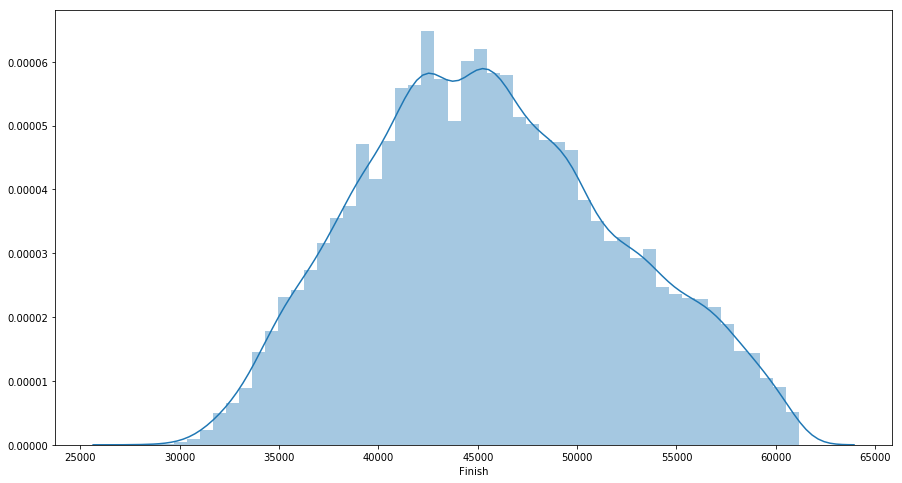

In [75]:
# distribution of target (race finish times in seconds)# distrib 
plt.figure(figsize=(15,8))
sns.distplot(data.Finish);

Text(0.5,0.98,'')

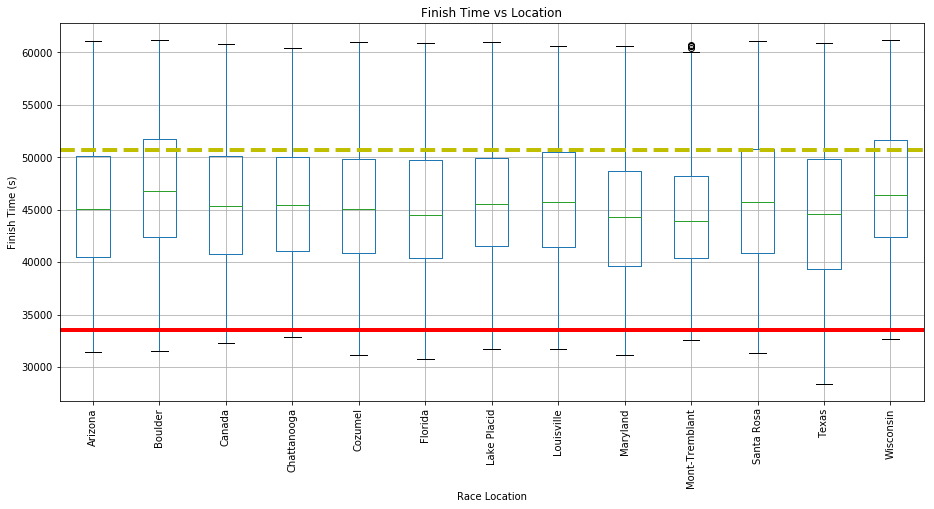

In [76]:
data.boxplot(column=['Finish'], by='Race', rot = 90, figsize = (15,7));
plt.axhline(y=33480,linewidth=4, color='r') #9 hours 18 minutes
plt.axhline(y=50688,linestyle = 'dashed',linewidth=4, color='y') #Gordon Ramsay IM Kona 14:04:48
plt.xlabel('Race Location') #add x data label
plt.ylabel('Finish Time (s)') #add y data label
plt.title('Finish Time vs Location') #adds title
plt.suptitle('') #gets rid of default boxplot title

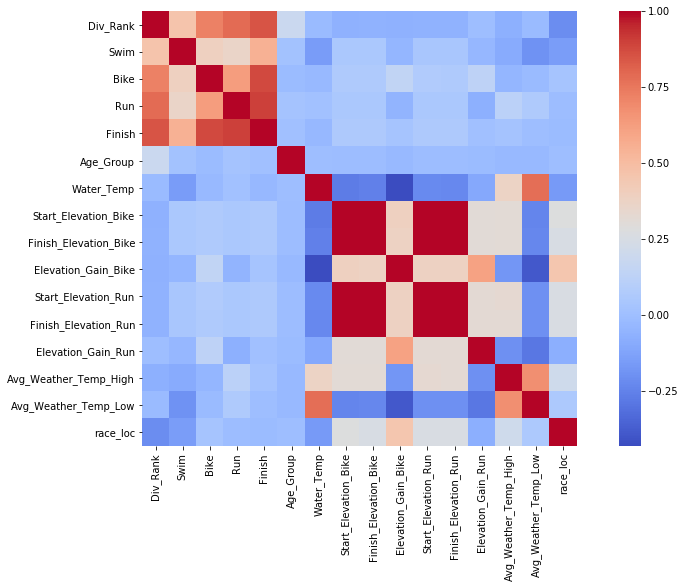

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), square=True, cmap='coolwarm');

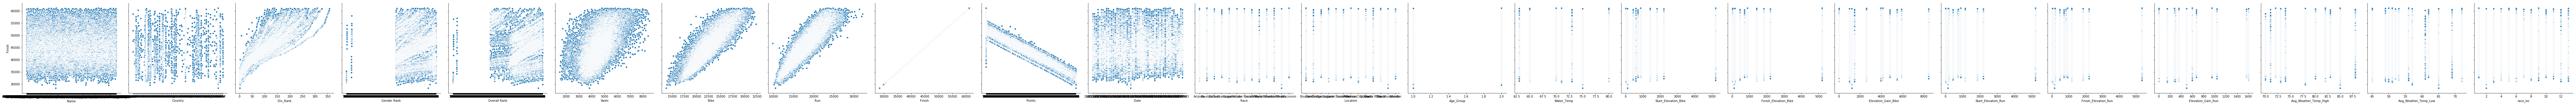

In [77]:
sns.pairplot(data=data,
                  y_vars=['Finish'],
                  x_vars=data.columns, size = 5);

# Dataset Modeling

## Linear Regression Modeling
* Interestingly the Linear Regression model shows that the features related to age, weather elements, course profiles, and location have no impact on the finishing time.
* The RSQ is .997 when using Swim, Bike, Run as features to try and determine Finishing times which makes sense because these times summed with transition times equal the Finish time.
* Features that one would hypothesize to have an impact to Swim, Bike, Run were also modeled and proven to have no impact to the finishing time.
* Each feature is analyzed individually to further validate that they do not have any impact on the finishing times.
* The greatest impact to Finish time is the Run, followed the Bike, and then the Swim. Although the Bike is the longest distance (112 miles) of the race, the 'slower' speed to complete the Run portion minimizes its impact on the Finish time. 
* A model of the x-variable Run is the best predictor for Finish.

In [60]:
data = data.dropna()

feature_cols = ['Age_Group', 'Water_Temp', 'Start_Elevation_Bike',
       'Finish_Elevation_Bike', 'Elevation_Gain_Bike', 'Start_Elevation_Run',
       'Finish_Elevation_Run', 'Elevation_Gain_Run', 'Avg_Weather_Temp_High',
       'Avg_Weather_Temp_Low','race_loc']

X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.01190285845056871

In [34]:
data = data.dropna()

feature_cols = ['Swim','Bike', 'Run']

X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.9971509934409184

In [128]:
data = data.dropna()

feature_cols = ['Swim']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.2998878645775125

In [129]:
data = data.dropna()

feature_cols = ['Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.7718537471918719

In [130]:
data = data.dropna()

feature_cols = ['Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.8151574117228875

In [131]:
data = data.dropna()

feature_cols = ['race_loc']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.00021961603445441735

In [132]:
data = data.dropna()

feature_cols = ['Age_Group']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

9.326986119018164e-05

In [133]:
data = data.dropna()

feature_cols = ['Water_Temp']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0009309771868315497

In [134]:
data = data.dropna()

feature_cols = ['Start_Elevation_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.004187692675087562

In [135]:
data = data.dropna()

feature_cols = ['Finish_Elevation_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.004137554573751423

In [136]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0009063304544990602

In [137]:
data = data.dropna()

feature_cols = ['Start_Elevation_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0043981373671562185

In [ ]:
data = data.dropna()

feature_cols = ['Finish_Elevation_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

In [138]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

4.656885842768688e-05

In [139]:
data = data.dropna()

feature_cols = ['Avg_Weather_Temp_High']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0006937492269173395

In [ ]:
data = data.dropna()

feature_cols = ['Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

In [80]:
data = data.dropna()

feature_cols = ['Water_Temp','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Swim']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.04003098325521004

In [140]:
data = data.dropna()

feature_cols = ['Water_Temp']
X= data[feature_cols]
y = data['Swim']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.023194952114104272

In [78]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike','Start_Elevation_Bike', 'Finish_Elevation_Bike','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Bike']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.03228998301919561

In [141]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike','Start_Elevation_Bike','Finish_Elevation_Bike']
X= data[feature_cols]
y = data['Bike']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.02224203039318695

In [79]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Run','Start_Elevation_Run', 'Finish_Elevation_Run','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Run']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.019257566812607818

# Disproving the Hypothesis
* From the Linear Regression we were able to disprove the hypothesis that different elements would have an impact on finishing times, this analysis will further disprove the hypothesis.

In [90]:
data = data.dropna()
data.groupby('Race').Finish.describe().sort_values('min',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
Chattanooga,1441.0,45723.607911,6070.491313,32829.0,41024.00,45427.0,50066.00,60421.0
Wisconsin,2606.0,47045.168074,6236.202048,32671.0,42381.25,46428.5,51697.75,61167.0
Mont-Tremblant,2057.0,44586.489548,5759.792569,32608.0,40347.00,43925.0,48239.00,60699.0
Canada,1466.0,45684.000000,6340.101253,32326.0,40813.25,45326.5,50126.25,60853.0
Lake Placid,2241.0,45884.392236,6075.009100,31753.0,41561.00,45527.0,49912.00,60989.0
Louisville,1930.0,45987.663731,6152.346480,31733.0,41480.00,45722.0,50526.00,60625.0
Boulder,1429.0,47054.276417,6499.976182,31520.0,42415.00,46757.0,51772.00,61180.0
Arizona,2121.0,45549.464404,6652.290791,31432.0,40526.00,45108.0,50167.00,61057.0
Santa Rosa,642.0,45845.042056,6778.404898,31322.0,40855.25,45725.5,50825.25,61049.0


In [94]:
konawin = data[(data.Div_Rank < 4)]
konawin.head()

,Name,Country,Div_Rank,Gender Rank,Overall Rank,Swim,Bike,Run,Finish,Points,...,Water_Temp,Start_Elevation_Bike,Finish_Elevation_Bike,Elevation_Gain_Bike,Start_Elevation_Run,Finish_Elevation_Run,Elevation_Gain_Run,Avg_Weather_Temp_High,Avg_Weather_Temp_Low,race_loc
22,"Giuliano, Ryan",USA,1,18,18,3831.0,13733.0,10528.0,28397.0,5000,...,75,111,111,1224,149,144,493,85,65,2
40,"VALENCIA, JUAN",COL,1,29,30,3221.0,14507.0,11479.0,29578.0,5000,...,75,111,111,1224,149,144,493,85,65,2
43,"Cook, Colin",USA,2,30,31,3919.0,14082.0,11333.0,29710.0,4737,...,75,111,111,1224,149,144,493,85,65,2
44,"O'Donnell, Jesse",USA,3,31,32,3734.0,13850.0,11786.0,29719.0,4735,...,75,111,111,1224,149,144,493,85,65,2
48,"Giuliano, Ryan",USA,1,19,19,3701.0,15659.0,10149.0,29844.0,5000,...,75,111,111,1224,149,144,493,78,57,2


In [93]:
konawin = konawin.dropna()
konawin.groupby('Race').Finish.describe().sort_values('min',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
Chattanooga,24.0,34456.875000,1059.749778,32829.0,33844.50,34300.5,34633.00,37025.0
Wisconsin,30.0,34551.600000,651.626802,32671.0,34262.50,34630.0,34924.25,35567.0
Mont-Tremblant,30.0,33875.700000,695.395306,32608.0,33207.00,34077.0,34448.25,34892.0
Canada,30.0,34558.166667,868.555125,32326.0,34003.50,34406.0,35175.75,36321.0
Lake Placid,31.0,34099.677419,1726.218881,31753.0,32819.50,34072.0,34938.50,40043.0
Louisville,24.0,33442.208333,806.375842,31733.0,32895.00,33578.5,34008.50,34931.0
Boulder,24.0,33685.166667,1053.916739,31520.0,33169.75,33528.0,34093.25,35634.0
Arizona,30.0,32863.533333,904.845261,31432.0,32149.00,32753.5,33541.00,34624.0
Santa Rosa,12.0,33118.583333,931.760646,31322.0,32473.50,33227.5,33964.00,34147.0
